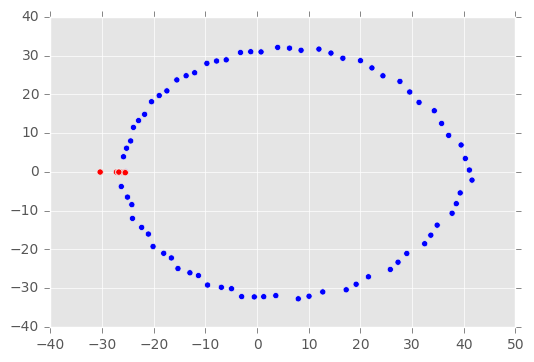

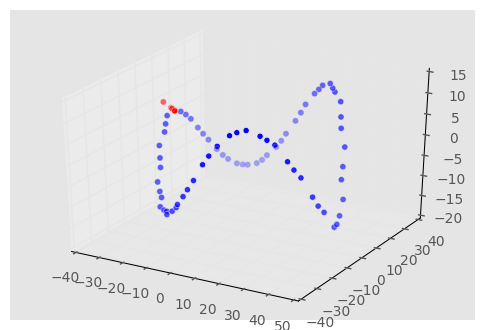

In [1]:
import os

import pandas as pd

from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

# Look pretty...
matplotlib.style.use('ggplot')


#
# TODO: Start by creating a regular old, plain, "vanilla"
# python list. You can call it 'samples'.
#
# .. your code here .. 

samples = []


#
# TODO: Write a for-loop that iterates over the images in the
# Module4/Datasets/ALOI/32/ folder, appending each of them to
# your list. Each .PNG image should first be loaded into a
# temporary NDArray, just as shown in the Feature
# Representation reading.
#
# Optional: Resample the image down by a factor of two if you
# have a slower computer. You can also convert the image from
# 0-255  to  0.0-1.0  if you'd like, but that will have no
# effect on the algorithm's results.
#
# .. your code here .. 

path = 'Datasets/ALOI/32/'

for filename in os.listdir(path):
    img = misc.imread(path + filename)
    img = img[::2, ::2]
    img = (img / 255.0).reshape(-1)
    samples.append(img)


#
# TODO: Once you're done answering the first three questions,
# right before you converted your list to a dataframe, add in
# additional code which also appends to your list the images
# in the Module4/Datasets/ALOI/32_i directory. Re-run your
# assignment and answer the final question below.
#
# .. your code here .. 

add_img = 'Datasets/ALOI/32i/'

for filename in os.listdir(add_img):
    img = misc.imread(add_img + filename)
    img = img[::2, ::2]
    img = (img / 255.0).reshape(-1)
    samples.append(img)


colors = []

for i in range(len(os.listdir(path))):
    colors.append('b')
    
for _ in range(len(os.listdir(add_img))):
    colors.append('r')



#
# TODO: Convert the list to a dataframe
#
# .. your code here .. 

df = pd.DataFrame(samples)


#
# TODO: Implement Isomap here. Reduce the dataframe df down
# to three components, using K=6 for your neighborhood size
#
# .. your code here .. 

from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=6, n_components=3)
iso.fit(df)
manifold = iso.transform(df)


#
# TODO: Create a 2D Scatter plot to graph your manifold. You
# can use either 'o' or '.' as your marker. Graph the first two
# isomap components
#
# .. your code here .. 

plt.scatter(manifold[:, 0], manifold[:, 1], marker='o', c=colors)


#
# TODO: Create a 3D Scatter plot to graph your manifold. You
# can use either 'o' or '.' as your marker:
#
# .. your code here .. 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(manifold[:, 0], manifold[:, 1], manifold[:, 2], c=colors)


plt.show()